# improt required libraries, uplode the dayabase & show it

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [1]:
df = pd.read_csv('bank-full.csv')

NameError: name 'pd' is not defined

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# discover the database

In [4]:
df.shape # data size 

(45211, 17)

In [5]:
df.info() #data information (type, colums and missed valeus )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.nunique() #check number of unique values


age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [7]:
# find the etch nunique values of string columes 
print (df.job.value_counts())
print (df.marital.value_counts())
print (df.education.value_counts())
print (df.default.value_counts())
print (df.housing.value_counts())
print (df.loan.value_counts())
print (df.contact.value_counts())
print (df.month.value_counts())
print (df.poutcome.value_counts())
print (df.Target.value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [8]:
df.describe().transpose() #check data describtion 

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
#check the (pdays) values 
df.pivot_table(index='pdays', aggfunc='size')

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Length: 559, dtype: int64

# Note: by understanding the data I have:
- the job ,contact, month, day and duration are un-needed information
- the rest of Srting data need to transfer to numberal data-type to be more useful. 
- replace the Output variable (target) from yes/no to 1/0

# make our data ready 

In [10]:
# drop un-needed data 
df.drop('job',axis=1,inplace=True)
df.drop('contact',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('duration',axis=1,inplace=True)
df.drop('day',axis=1,inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,married,tertiary,no,2143,yes,no,1,-1,0,unknown,no
1,44,single,secondary,no,29,yes,no,1,-1,0,unknown,no
2,33,married,secondary,no,2,yes,yes,1,-1,0,unknown,no
3,47,married,unknown,no,1506,yes,no,1,-1,0,unknown,no
4,33,single,unknown,no,1,no,no,1,-1,0,unknown,no


In [11]:
#replace the yes and no values as 0 for no and 1 for yes 
df["default"].replace({'no': 0, 'yes': 1}, inplace=True)
df["housing"].replace({'no': 0, 'yes': 1}, inplace=True)
df["loan"].replace({'no': 0, 'yes': 1}, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,married,tertiary,0,2143,1,0,1,-1,0,unknown,no
1,44,single,secondary,0,29,1,0,1,-1,0,unknown,no
2,33,married,secondary,0,2,1,1,1,-1,0,unknown,no
3,47,married,unknown,0,1506,1,0,1,-1,0,unknown,no
4,33,single,unknown,0,1,0,0,1,-1,0,unknown,no


In [12]:
#replace the (marital) to be 1 = married and 0= single or divorced
df["marital"].replace({'single': 0, 'married': 1, 'divorced': 0}, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,1,tertiary,0,2143,1,0,1,-1,0,unknown,no
1,44,0,secondary,0,29,1,0,1,-1,0,unknown,no
2,33,1,secondary,0,2,1,1,1,-1,0,unknown,no
3,47,1,unknown,0,1506,1,0,1,-1,0,unknown,no
4,33,0,unknown,0,1,0,0,1,-1,0,unknown,no


In [13]:
#replace the (poutcome) to -1= failure , 0 = unknown and other and 1= success
df["poutcome"].replace({'failure': -1, 'success': 1, 'unknown': 0, 'other': 0}, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,1,tertiary,0,2143,1,0,1,-1,0,0,no
1,44,0,secondary,0,29,1,0,1,-1,0,0,no
2,33,1,secondary,0,2,1,1,1,-1,0,0,no
3,47,1,unknown,0,1506,1,0,1,-1,0,0,no
4,33,0,unknown,0,1,0,0,1,-1,0,0,no


In [14]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [15]:
#replace the (education) to 0 = unknown , 1 = primary , 2 = secondary and 3 =tertiary 
df["education"].replace({'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,1,3,0,2143,1,0,1,-1,0,0,no
1,44,0,2,0,29,1,0,1,-1,0,0,no
2,33,1,2,0,2,1,1,1,-1,0,0,no
3,47,1,0,0,1506,1,0,1,-1,0,0,no
4,33,0,0,0,1,0,0,1,-1,0,0,no


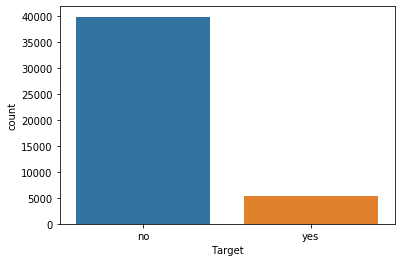

In [16]:
sns.countplot(df['Target'])

In [17]:
df["Target"].replace({'no': 0, 'yes': 1}, inplace=True)
df.head()

,age,marital,education,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target
0,58,1,3,0,2143,1,0,1,-1,0,0,0
1,44,0,2,0,29,1,0,1,-1,0,0,0
2,33,1,2,0,2,1,1,1,-1,0,0,0
3,47,1,0,0,1506,1,0,1,-1,0,0,0
4,33,0,0,0,1,0,0,1,-1,0,0,0


# 
check our data after fix it

In [18]:
df.shape

(45211, 12)

In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
marital,45211.0,0.601933,0.489505,0.0,0.0,1.0,1.0,1.0
education,45211.0,2.060516,0.778704,0.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


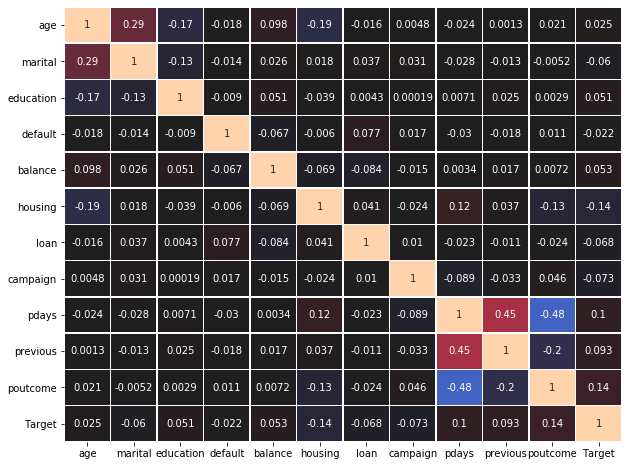

In [20]:
#relationship between different variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            )
plt.show()

# now our data is ready to model 

In [21]:
#Split the data into training and test set in the ratio of 70:30
X_train, X_test, y_train, y_test =train_test_split(df.drop('Target',axis=1), df['Target'], test_size=.30,
                                                   random_state=22)
X_train.shape,X_test.shape

((31647, 11), (13564, 11))

# Decision Tree Classifier (default)

In [22]:
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
print("Train: %.2f" % tree.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % tree.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.82


# Adaboost Ensemble Algorithm

In [24]:
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(n_estimators = 100)
boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [25]:
print("Train: %.2f" % boost.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % boost.score(X_test, y_test))  # performance on test data

Train: 0.89
Test: 0.89


# Bagging Classifier Algorithm

In [26]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(n_estimators=50)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [27]:
print("Train: %.2f" % bag.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % bag.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


# Random forest model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rndm = RandomForestClassifier(n_estimators = 100 )
rndm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
print("Train: %.2f" % rndm.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % rndm.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.88


# conclusion 

- the best default are Adaboost Ensemble and Random forest. 89% in train and test.
- the default Bagging and Decision Tree are doing well in train score 100%, but becouse of overfitting the test scours are low.